<a href="https://colab.research.google.com/github/aditya8075/Laptop-Price-Predictor----supervised-machine-learning----Regression/blob/main/laptop_price_prediction_modified.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/laptop_data.csv')

In [ ]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [ ]:
df.shape

(1303, 12)

In [ ]:
df.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [ ]:
df=df.drop(['Unnamed: 0'],axis=1)

In [ ]:
df.isna().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [ ]:
#cheaking the duplicates values

df.duplicated().sum()

29

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [ ]:
#lets see the catagorical columns and Integers

catvar=df.select_dtypes(include=['object']).columns
numvar=df.select_dtypes(include=['int32','int64','float32','float64']).columns
print(catvar)
print(numvar)

Index(['Company', 'TypeName', 'ScreenResolution', 'Cpu', 'Ram', 'Memory',
       'Gpu', 'OpSys', 'Weight'],
      dtype='object')
Index(['Inches', 'Price'], dtype='object')


In [ ]:
def uniquevals(col):
  print(f' details of perticular column {col} is :  {df[col].unique()}')

def valuecounts(col):
  print(f'value counts of perticular column  {col} is : {df[col].value_counts()}')



for col in df.columns:
  uniquevals(col)
  print('-'*75)

 details of perticular column Company is :  ['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']
---------------------------------------------------------------------------
 details of perticular column TypeName is :  ['Ultrabook' 'Notebook' 'Netbook' 'Gaming' '2 in 1 Convertible'
 'Workstation']
---------------------------------------------------------------------------
 details of perticular column Inches is :  [13.3 15.6 15.4 14.  12.  11.6 17.3 10.1 13.5 12.5 13.  18.4 13.9 12.3
 17.  15.  14.1 11.3]
---------------------------------------------------------------------------
 details of perticular column ScreenResolution is :  ['IPS Panel Retina Display 2560x1600' '1440x900' 'Full HD 1920x1080'
 'IPS Panel Retina Display 2880x1800' '1366x768'
 'IPS Panel Full HD 1920x1080' 'IPS Panel Retina Display 2304x1440'
 'IPS Panel Full HD / Touchscreen 1920x1080'
 'Full HD / Touchscree

In [ ]:
# so on observation we can see that if we remove 'GB' from Ram then I can make it as an integer same goes for memory 

In [ ]:
df["Ram"]=df["Ram"].str.replace('GB','')
df['Weight']=df['Weight'].str.replace('kg','')

In [ ]:
df['Weight']=df['Weight'].astype('float32')
df["Ram"]=df["Ram"].astype('int32')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB



EXPLORATORY DATA ANALYSIS

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


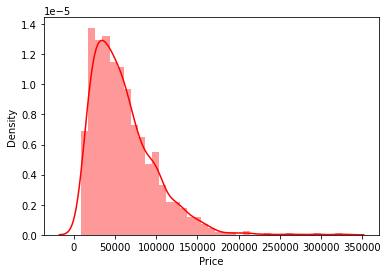

In [ ]:
sns.distplot(df['Price'],color='red')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

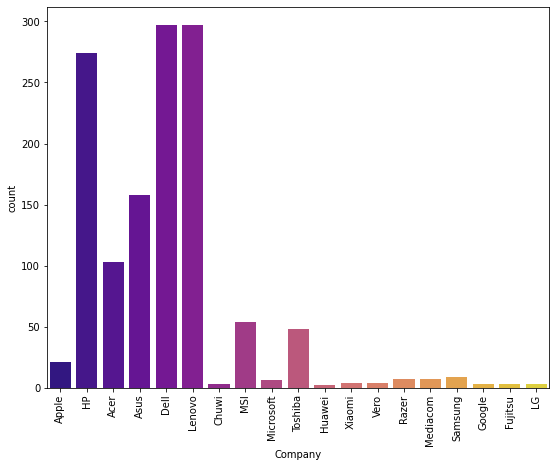

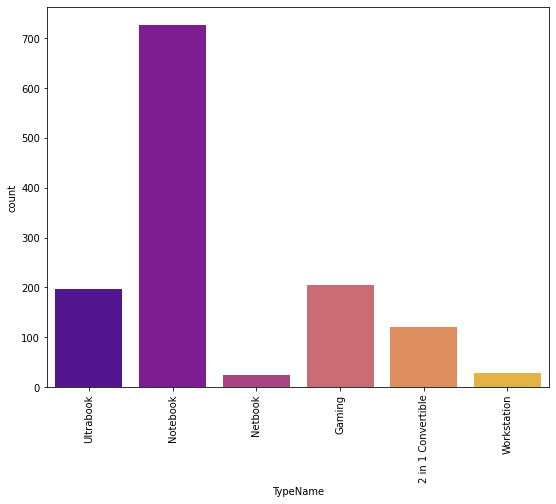

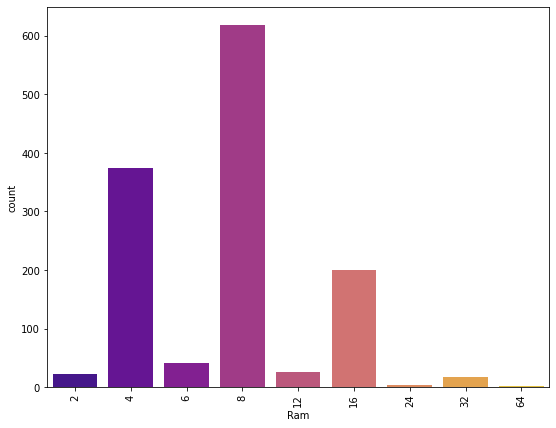

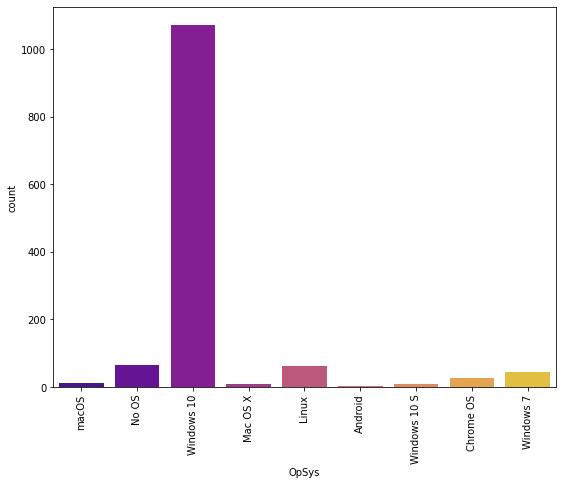

In [ ]:
def drawplot(col):
   plt.figure(figsize=(9,7))
   sns.countplot(df[col],palette='plasma')
   plt.xticks(rotation='vertical')

toview=['Company','TypeName','Ram','OpSys']
for col in toview:
    drawplot(col)

In [ ]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

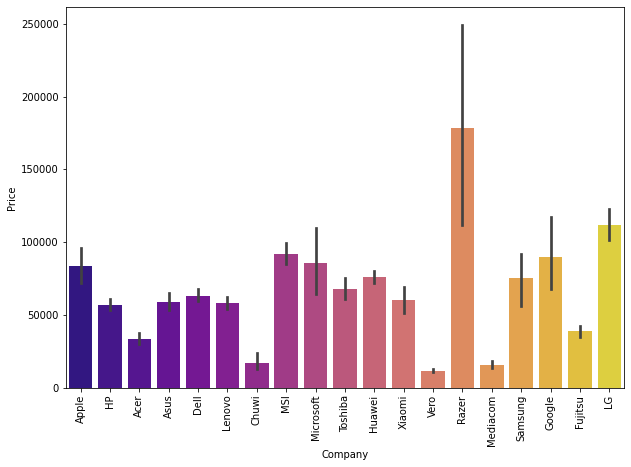

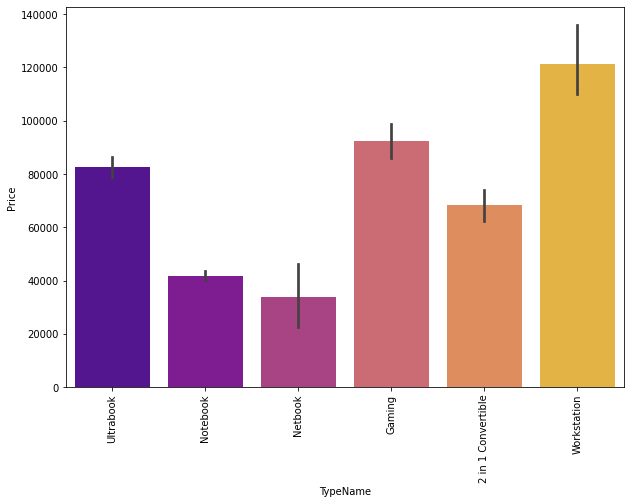

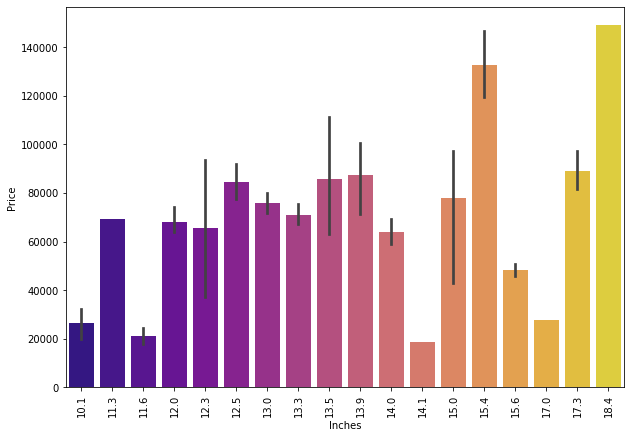

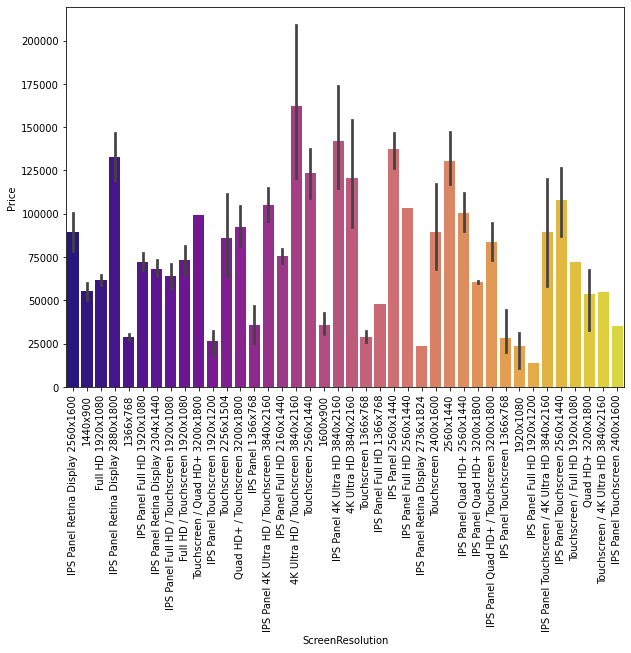

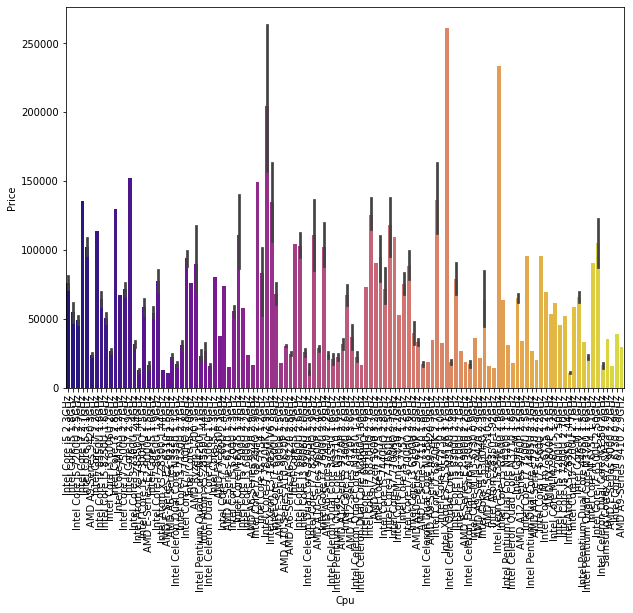

In [ ]:
def drawplot(col,price):
    plt.figure(figsize=(10,7))
    sns.barplot(x=df[col],y=df[price],palette='plasma')
    plt.xticks(rotation='vertical')

features=['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight']
Lebel=["Price"]
for col  in features:
  for price in Lebel: 
    drawplot(col,price)

In [ ]:
sns.scatterplot(x=df['Inches'],y=df['Price'])

In [ ]:
df.columns

In [ ]:
df['ScreenResolution'].value_counts()

In [ ]:
df['TouchScreen']=df["ScreenResolution"].apply(lambda element : 1 if 'Touchscreen' in element else 0)

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
sns.countplot(df['TouchScreen'])

In [ ]:
sns.barplot(x=df['TouchScreen'],y=df['Price'])

In [ ]:
df.columns

In [ ]:
df['IPS Panel']=df["ScreenResolution"].apply(lambda element : 1 if 'IPS Panel' in element else 0)

In [ ]:
df.sample(5)

In [ ]:
sns.countplot(df['IPS Panel'])

In [ ]:
sns.barplot(x=df['TouchScreen'],y=df['Price'])

EXTRACTING THE X RESOLUTION AND Y RESOLUTION

In [ ]:
df.columns

In [ ]:
splitdf=df['ScreenResolution'].str.split('x',n=1,expand=True)

In [ ]:
splitdf.head()

In [ ]:
df['X_res']=splitdf[0]
df['Y_res']=splitdf[1]

In [ ]:
df.sample(5)

In [ ]:
df['X_res']=df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x : x[0])

In [ ]:
df.sample(5)

In [ ]:
df['X_res']=df['X_res'].astype('int')
df['Y_res']=df['Y_res'].astype('int')

In [ ]:
df.info()

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,cmap='plasma')

In [ ]:
df.corr()['Price']

In [ ]:
df['PPI']=(((df['X_res']**2+df['Y_res']**2))**0.5/df['Inches']).astype('float')

In [ ]:
df.sample(5)

In [ ]:
df.corr()['Price']

In [ ]:
df.columns

In [ ]:
df.head()

NOW WE WILL WORK ON CPU COLUMN

In [ ]:
df['Cpu'].value_counts()

In [ ]:
df['Cpu']

In [ ]:
text='Intel Core i5 2.3GHz'

In [ ]:
' '.join(text.split()[:3])

In [ ]:
df["CPU_name"]=df['Cpu'].apply(lambda text : " ".join(text.split()[:3]))

In [ ]:
def processsortype(text):
    if text=='Intel Core i3' or text=='Intel Core i5' or text=='Intel Core i7':
        return text


    else:
          if text.split()[0]=='Intel':
            return 'Other Intel Processor'

          else :
            return 'AMD Processor'

In [ ]:
df["CPU_name"]=df["CPU_name"].apply(lambda text : processsortype(text))
df.sample(50)

In [ ]:
sns.countplot(df['CPU_name'],palette='plasma')
plt.xticks(rotation='vertical')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

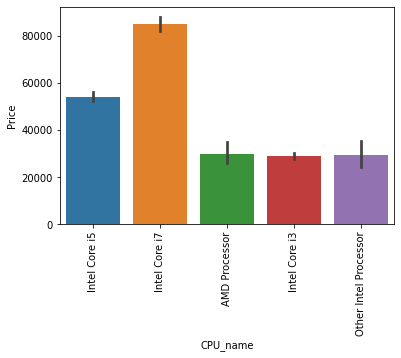

In [ ]:
sns.barplot(df['CPU_name'],df['Price'])
plt.xticks(rotation='vertical')

In [ ]:
#droping the cpu column
df.drop(columns='Cpu',inplace=True)

In [ ]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS Panel,X_res,Y_res,PPI,CPU_name
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005,Intel Core i5
1,Apple,Ultrabook,13.3,1440x900,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940,Intel Core i5
2,HP,Notebook,15.6,Full HD 1920x1080,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998,Intel Core i5
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624,Intel Core i7
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005,Intel Core i5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


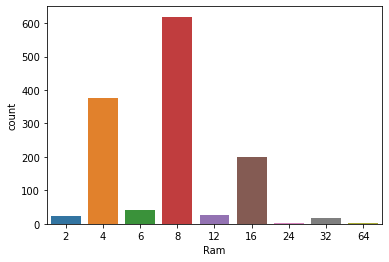

In [ ]:
sns.countplot(df['Ram'])

In [ ]:
#Ram is having good relation with price
sns.barplot(x=df['Ram'],y=df['Price'])

In [ ]:
#about the memory column
df['Memory'].value_counts()

In [ ]:
df['Memory']=df['Memory'].astype(str).replace('\.0',' ',regex=True)
df['Memory']=df['Memory'].str.replace('GB',' ')
df['Memory']=df['Memory'].str.replace('TB','000')
#split the word across the '+' charector
newdf=df['Memory'].str.split('+',n=1,expand=True)




In [ ]:
newdf.sample(5)

In [ ]:
df['first']=newdf[0]
df['first'].str.strip()


In [ ]:
df.head(10)

In [ ]:
def applychanges(values):
     df['Layer1' + values]=df['first'].apply(lambda x : 1 if values in x else 0)

listapply=['SSD','HDD','Hybrid','Flash Storage']
for values in listapply:
    applychanges(values)


In [ ]:
df.head()

In [ ]:
df['first']=df['first'].str.replace(r'\D','')
df['first'].value_counts()

In [ ]:
df['second']=newdf[1]
df.head()


In [ ]:
df

In [ ]:
def applychanges(values):
     df['Layer2' + values]=df['second'].apply(lambda x : 1 if values in x else 0)

listapply1=['SSD','HDD','Hybrid','Flash Storage']
df['second']=df['second'].fillna('0')
for values in listapply1:
    applychanges(values)

In [ ]:
df

In [ ]:
df['second']=df['second'].str.replace(r'\D','')
df['second'].value_counts()

In [ ]:
df.columns

In [ ]:
df.columns

In [ ]:

df['second']=df['second'].astype('int')
df['first']=df['first'].astype('int')

In [ ]:
df['HDD']=(df['first']*df['Layer1HDD'] + df['second']*df['Layer2HDD'])
df['SSD']=(df['first']*df['Layer1SSD'] + df['second']*df['Layer2SSD'])
df['Hybrid']=(df['first']*df['Layer1Hybrid'] + df['second']*df['Layer2Hybrid'])
df['Flash Storage']=(df['first']*df['Layer1Flash Storage'] + df['second']*df['Layer2Flash Storage'])

In [ ]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,...,Layer1Flash Storage,second,Layer2SSD,Layer2HDD,Layer2Hybrid,Layer2Flash Storage,HDD,SSD,Hybrid,Flash Storage
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,...,0,0,0,0,0,0,0,128,0,0
1,Apple,Ultrabook,13.3,1440x900,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,...,1,0,0,0,0,0,0,0,0,128
2,HP,Notebook,15.6,Full HD 1920x1080,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,...,0,0,0,0,0,0,0,256,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,...,0,0,0,0,0,0,0,512,0,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,...,0,0,0,0,0,0,0,256,0,0


In [ ]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Ram', 'Memory',
       'Gpu', 'OpSys', 'Weight', 'Price', 'TouchScreen', 'IPS Panel', 'X_res',
       'Y_res', 'PPI', 'CPU_name', 'first', 'Layer1SSD', 'Layer1HDD',
       'Layer1Hybrid', 'Layer1Flash Storage', 'second', 'Layer2SSD',
       'Layer2HDD', 'Layer2Hybrid', 'Layer2Flash Storage', 'HDD', 'SSD',
       'Hybrid', 'Flash Storage'],
      dtype='object')

In [ ]:
df1=df.copy()

In [ ]:
df1

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,...,Layer1Flash Storage,second,Layer2SSD,Layer2HDD,Layer2Hybrid,Layer2Flash Storage,HDD,SSD,Hybrid,Flash Storage
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,...,0,0,0,0,0,0,0,128,0,0
1,Apple,Ultrabook,13.3,1440x900,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,...,1,0,0,0,0,0,0,0,0,128
2,HP,Notebook,15.6,Full HD 1920x1080,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,...,0,0,0,0,0,0,0,256,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,...,0,0,0,0,0,0,0,512,0,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,...,0,0,0,0,0,0,0,256,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,4,128 SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,...,0,0,0,0,0,0,0,128,0,0
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,16,512 SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,...,0,0,0,0,0,0,0,512,0,0
1300,Lenovo,Notebook,14.0,1366x768,2,64 Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,...,1,0,0,0,0,0,0,0,0,64
1301,HP,Notebook,15.6,1366x768,6,1000 HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,...,0,0,0,0,0,0,1000,0,0,0


In [ ]:
df1.drop(columns=['ScreenResolution','Layer1SSD', 'Layer1HDD',
       'Layer1Hybrid', 'Layer1Flash Storage','second', 'Layer2SSD',
       'Layer2HDD', 'Layer2Hybrid', 'Layer2Flash Storage'],inplace=True)

In [ ]:
df1.head()

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS Panel,X_res,Y_res,PPI,CPU_name,first,HDD,SSD,Hybrid,Flash Storage
0,Apple,Ultrabook,13.3,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005,Intel Core i5,128,0,128,0,0
1,Apple,Ultrabook,13.3,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940,Intel Core i5,128,0,0,0,128
2,HP,Notebook,15.6,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998,Intel Core i5,256,0,256,0,0
3,Apple,Ultrabook,15.4,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624,Intel Core i7,512,0,512,0,0
4,Apple,Ultrabook,13.3,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005,Intel Core i5,256,0,256,0,0


In [ ]:
df1.drop(columns=['Inches'],inplace=True)

In [ ]:
df=df1.copy()

In [ ]:
df.corr()['Price']

Ram              0.743007
Weight           0.210370
Price            1.000000
TouchScreen      0.191226
IPS Panel        0.252208
X_res            0.556529
Y_res            0.552809
PPI              0.473487
first           -0.122365
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash Storage   -0.040511
Name: Price, dtype: float64

In [ ]:
df.drop(columns=['first'],inplace=True)

In [ ]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS Panel,X_res,Y_res,PPI,CPU_name,HDD,SSD,Hybrid,Flash Storage
694,Toshiba,Notebook,8,256 SSD,Intel HD Graphics 620,Windows 10,1.50,51841.44,0,1,1920,1080,165.632118,Intel Core i5,0,256,0,0
429,Mediacom,2 in 1 Convertible,4,32 SSD,Intel HD Graphics 500,Windows 10,1.16,15930.72,1,1,1920,1080,189.905791,Other Intel Processor,0,32,0,0
164,Acer,Notebook,4,1000 HDD,Intel HD Graphics 500,Windows 10,2.10,18541.44,0,0,1366,768,100.454670,Other Intel Processor,1000,0,0,0
1044,HP,Notebook,4,500 HDD,Intel HD Graphics 520,Windows 10,1.54,53280.00,0,0,1920,1080,157.350512,Intel Core i5,500,0,0,0
398,Dell,Workstation,8,256 SSD,Nvidia Quadro M1200,Windows 10,1.78,144495.36,1,0,3840,2160,282.423996,Intel Core i7,0,256,0,0


In [ ]:
df.drop(columns=['Memory'],inplace=True)

In [ ]:
df.corr()['Price']

Ram              0.743007
Weight           0.210370
Price            1.000000
TouchScreen      0.191226
IPS Panel        0.252208
X_res            0.556529
Y_res            0.552809
PPI              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash Storage   -0.040511
Name: Price, dtype: float64

In [ ]:
df.columns

Index(['Company', 'TypeName', 'Ram', 'Gpu', 'OpSys', 'Weight', 'Price',
       'TouchScreen', 'IPS Panel', 'X_res', 'Y_res', 'PPI', 'CPU_name', 'HDD',
       'SSD', 'Hybrid', 'Flash Storage'],
      dtype='object')

In [ ]:
df.drop(columns=['Hybrid','Flash Storage'],inplace=True)

In [ ]:
df['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [ ]:
a=df['Gpu'][0]

In [ ]:
a

'Intel Iris Plus Graphics 640'

In [ ]:
print(a.split()[0])

Intel


In [ ]:
df['Gpu Brand']=df['Gpu'].apply(lambda x : x.split()[0])

In [ ]:
df.sample(5)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS Panel,X_res,Y_res,PPI,CPU_name,HDD,SSD,Gpu Brand
1230,Lenovo,Netbook,16,Intel HD Graphics 520,Windows 10,1.30,87912.0000,1,1,1920,1080,176.232574,Intel Core i7,0,512,Intel
270,Apple,Ultrabook,8,Intel Iris Graphics 550,macOS,1.37,104370.1920,0,1,2560,1600,226.983005,Intel Core i5,0,512,Intel
591,Lenovo,Notebook,12,AMD Radeon 530,Windows 10,2.20,50562.7200,0,0,1920,1080,141.211998,AMD Processor,0,512,AMD
893,Lenovo,Ultrabook,8,Intel HD Graphics 620,Windows 10,1.32,95850.7200,0,1,1920,1080,157.350512,Intel Core i5,0,256,Intel
1212,MSI,Gaming,16,Nvidia GeForce GTX 1060,Windows 10,2.43,103842.1872,0,1,1920,1080,127.335675,Intel Core i7,1000,256,Nvidia


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


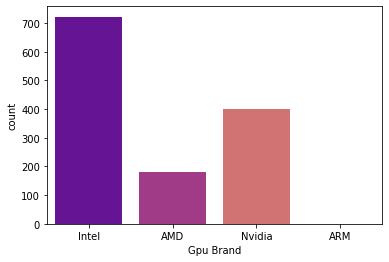

In [ ]:
sns.countplot(df['Gpu Brand'],palette='plasma')

In [ ]:
df=df[df['Gpu Brand'] != 'ARM']

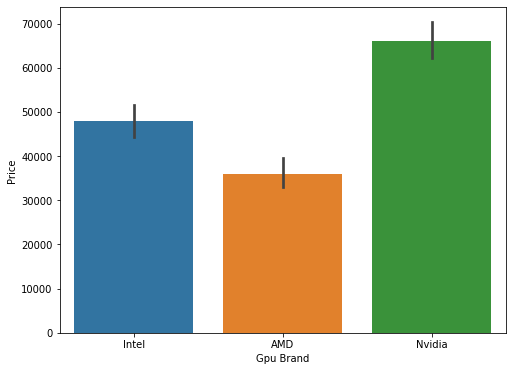

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x=df['Gpu Brand'],y=df['Price'],estimator=np.median)

In [ ]:
df.columns

Index(['Company', 'TypeName', 'Ram', 'Gpu', 'OpSys', 'Weight', 'Price',
       'TouchScreen', 'IPS Panel', 'X_res', 'Y_res', 'PPI', 'CPU_name', 'HDD',
       'SSD', 'Gpu Brand'],
      dtype='object')

In [ ]:
df.drop(['Gpu'],inplace=True,axis=1)

In [ ]:
df.sample(5)

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS Panel,X_res,Y_res,PPI,CPU_name,HDD,SSD,Gpu Brand
948,Dell,Notebook,4,Windows 10,2.36,35111.52,0,0,1600,900,106.113062,Intel Core i3,1000,0,AMD
675,MSI,Gaming,16,Windows 10,2.40,68944.32,0,0,1920,1080,141.211998,Intel Core i7,1000,256,Nvidia
989,Dell,Notebook,8,Windows 10,1.60,59620.32,0,0,1920,1080,157.350512,Intel Core i5,0,128,Intel
385,Lenovo,Ultrabook,8,Windows 10,1.13,121584.96,0,1,2560,1440,209.800683,Intel Core i7,0,512,Intel
623,Fujitsu,Notebook,8,Windows 10,2.20,42570.72,0,0,1366,768,100.454670,Intel Core i5,0,256,Intel


In [ ]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

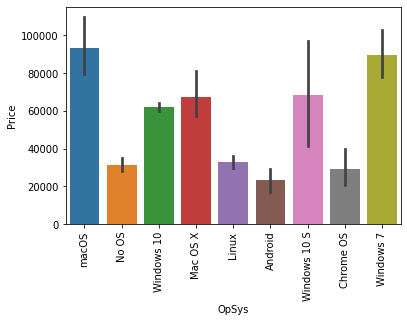

In [ ]:
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation='vertical')

In [ ]:
df['OpSys'].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

In [ ]:
def setcatagory(text):
    
    if text =='Windows 10' or text =='Windows 7' or text == 'Windows 10 S':
        return 'Windows'

     
    elif text=='macOS'or text=='Mac OS X':
       
        return 'Mac OS'

    else:
        return 'Others'


df['OpSys']=df['OpSys'].apply(lambda x : setcatagory(x))

In [ ]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS Panel,X_res,Y_res,PPI,CPU_name,HDD,SSD,Gpu Brand
0,Apple,Ultrabook,8,Mac OS,1.37,71378.6832,0,1,2560,1600,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Mac OS,1.34,47895.5232,0,0,1440,900,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Others,1.86,30636.0000,0,0,1920,1080,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,Mac OS,1.83,135195.3360,0,1,2880,1800,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Mac OS,1.37,96095.8080,0,1,2560,1600,226.983005,Intel Core i5,0,256,Intel


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


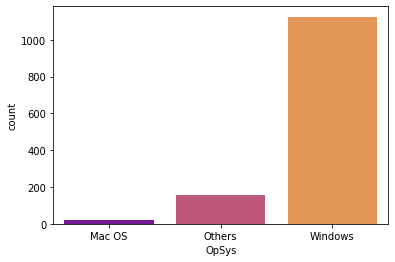

In [ ]:
sns.countplot(df['OpSys'],palette='plasma')

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

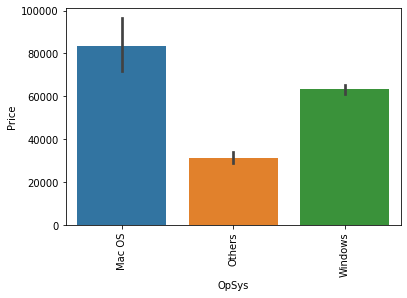

In [ ]:
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation='vertical')

WEIGHT ANALYSIS

In [ ]:
sns.distplot(df['Weight'])

In [ ]:
sns.scatterplot(x=df['Weight'],y=df['Price'])

PRICE ANALYSIS

In [ ]:
sns.distplot(df['Price'])

In [ ]:
sns.distplot(np.log(df['Price']))

In [ ]:
df.corr()['Price']

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(),annot=True,cmap='plasma')

In [ ]:
df.drop(['X_res','Y_res'],axis=1,inplace=True)

In [ ]:
df.head()

MODEL BUILDING

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree



In [ ]:
test=np.log(df['Price'])
train=df.drop(['Price'],axis=1)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(train,test,test_size=0.15,random_state=2)

X_train.shape,X_test.shape




In [ ]:
mapper={i:value for i,value in enumerate(X_train.columns)}

In [ ]:
mapper

LINEAR REGRESSION

In [ ]:
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11])],remainder='passthrough')

step2=LinearRegression()

pipe=Pipeline([('step1',step1),('step2',step2)])


pipe.fit(X_train,y_train)

y_pred=pipe.predict(X_test)


print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

Ridge Regression

In [ ]:
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11])],remainder='passthrough')

step2=Ridge(alpha=5)

pipe=Pipeline([('step1',step1),('step2',step2)])


pipe.fit(X_train,y_train)

y_pred=pipe.predict(X_test)


print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

Lasso Regression

In [ ]:
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11])],remainder='passthrough')

step2=Lasso(alpha=0.001)

pipe=Pipeline([('step1',step1),('step2',step2)])


pipe.fit(X_train,y_train)

y_pred=pipe.predict(X_test)


print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

DECISION TREE

In [ ]:
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11])],remainder='passthrough')

step2=DecisionTreeRegressor(max_depth=8)

pipe=Pipeline([('step1',step1),('step2',step2)])


pipe.fit(X_train,y_train)

y_pred=pipe.predict(X_test)


print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

RANDOM FOREST

In [ ]:
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11])],remainder='passthrough')

step2=RandomForestRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)

pipe=Pipeline([('step1',step1),('step2',step2)])


pipe.fit(X_train,y_train)

y_pred=pipe.predict(X_test)


print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

In [ ]:
import pickle
pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [ ]:
train.head()

HYPERPARAMETER TUNING FOR RANDOM FOREST

In [ ]:
indexlist=[0,1,3,8,11]
transformlist=[]
for key , value in mapper.item():
       if key in indexlist:
         transformlist.append(value)

transformlist